### 1 Import Libraries/Dataset (0 mark)

    1.1) Import the required libraries and the dataset.
    1.2) Check the GPU available.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string
from nltk.tokenize import word_tokenize

import category_encoders as ce
from time import process_time

[nltk_data] Downloading package punkt to C:\Users\Amal
[nltk_data]     Shaji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amal
[nltk_data]     Shaji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
gpu_available = tf.config.list_physical_devices('GPU')
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

print("GPu :" ,gpu_available)
print("Cuda avail;bale in GPU : ", is_cuda_gpu_available)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPu : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Cuda avail;bale in GPU :  True


In [3]:
#importing the dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("valid.csv")

In [4]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


### 2. Data Visualization (0.75 mark)

    2.1) Print at least two records from each class of the dataset, for a sanity check that labels match the text.
    2.2) Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
    2.3) Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
    2.4) Print the shapes of train and test data.

In [5]:
df.Y.unique()

array(['LQ_CLOSE', 'HQ', 'LQ_EDIT'], dtype=object)

2.1) Print at least two records from each class of the dataset, for a sanity check that labels match the text.

In [6]:
print("First 5 Records from class 'LQ_CLOSE'")
rslt_df = df.loc[df['Y'] == 'LQ_CLOSE']
lq_close_count=len(rslt_df)
rslt_df.head(5)

First 5 Records from class 'LQ_CLOSE'


,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
5,34554026,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,<c><pointers><data-structures>,2016-01-01 06:21:17,LQ_CLOSE
11,34555643,What's the best way to store text data?,"<p>I am kinda new to Android development, but ...",<android><android-file>,2016-01-01 11:15:21,LQ_CLOSE
21,34559616,how to make sure a file's integrity in C#,<p>I am deploying a file along with a C# appli...,<c#><.net>,2016-01-01 20:10:18,LQ_CLOSE
25,34560942,C# - Count a specific word in richTextBox1 and...,"<p>I'm not sure, if this question is unique, b...",<c#>,2016-01-01 23:06:53,LQ_CLOSE


In [7]:
print("First 5 Records from class 'LQ_EDIT'")
rslt_df = df.loc[df['Y'] == 'LQ_EDIT']
lq_edit_count=len(rslt_df)
rslt_df.head(5)

First 5 Records from class 'LQ_EDIT'


,Id,Title,Body,Tags,CreationDate,Y
6,34554206,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",<javascript><jquery><jquery-ui>,2016-01-01 06:55:18,LQ_EDIT
7,34554671,Resizing containers in bootstrap,I am new to bootstrap and i would like to find...,<jquery><html><css><twitter-bootstrap>,2016-01-01 08:32:05,LQ_EDIT
9,34554982,TextBox Value Disappears VB6,I my case I am having two form Form 1 and Form...,<vb6>,2016-01-01 09:27:44,LQ_EDIT
12,34556569,ios/objective-c/xcode: Expand Label based on q...,I have a UIlabel linked to a property that can...,<ios><storyboard><uilabel>,2016-01-01 13:33:36,LQ_EDIT
13,34556906,"output FILE ,is this a fault?",\r\nmy code here\r\n\r\n #include <stdi...,<c++>,2016-01-01 14:20:01,LQ_EDIT


In [8]:
print("First 5 Records from class 'HQ'")
rslt_df = df.loc[df['Y'] == 'HQ']
hq_count=len(rslt_df)
rslt_df.head(5)

First 5 Records from class 'HQ'


,Id,Title,Body,Tags,CreationDate,Y
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
8,34554871,Changing Theme in Windows 10 UWP App Programma...,<p>I was able to change theme using <code>this...,<c#><windows-10><windows-10-mobile><windows-10...,2016-01-01 09:05:45,HQ


2.2) Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)

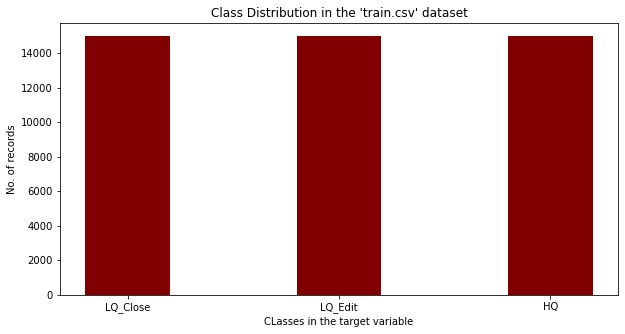

In [9]:
courses = ["LQ_Close","LQ_Edit","HQ"]
values = [lq_close_count,lq_edit_count,hq_count]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("CLasses in the target variable")
plt.ylabel("No. of records")
plt.title("Class Distribution in the 'train.csv' dataset")
plt.show()

2.4) Print the shapes of train and test data.

In [10]:
print("Shape of train dataset : ",df.shape)
print("Shae of test dataset   : ",df_test.shape)

Shape of train dataset :  (45000, 6)
Shae of test dataset   :  (15000, 6)


### 3. Data Pre-processing (0.25 mark)

    3.1) Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
    3.2) Please usethis pre-trained embedding layer  (Links to an external site.)from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
    3.3) Bring the train and test data in the required format.

We believe id and creationDate columns doesn't contribute much to the final model. hence we are removing these 2 columns. Also as the other 3 columns are text alone , we are merging them to form a single column named "new_column". This we believe will help in easy faster preprocessing.

In [11]:
df['new_column'] =df['Title'] + df['Body']+df['Tags']
df=df.drop(['Title'], axis = 1)
df=df.drop(['Body'], axis = 1)
df=df.drop(['Tags'], axis = 1)
df=df.drop(['CreationDate'], axis = 1)
df=df.drop(['Id'], axis = 1)

df_test['new_column'] =df_test['Title'] + df_test['Body']+df_test['Tags']
df_test=df_test.drop(['Title'], axis = 1)
df_test=df_test.drop(['Body'], axis = 1)
df_test=df_test.drop(['Tags'], axis = 1)
df_test=df_test.drop(['CreationDate'], axis = 1)
df_test=df_test.drop(['Id'], axis = 1)

In [12]:
df.head()

,Y,new_column
0,LQ_CLOSE,Java: Repeat Task Every Random Seconds<p>I'm a...
1,HQ,Why are Java Optionals immutable?<p>I'd like t...
2,HQ,Text Overlay Image with Darkened Opacity React...
3,HQ,Why ternary operator in swift is so picky?<p>T...
4,HQ,hide/show fab with scale animation<p>I'm using...


Now we have a target variable and a single dependent variable which is a merge of all the three columns. We are doing some of the data cleaning on the text.

In [13]:
import re
def clean(sen):
    sentence = re.sub("http[s]*://[^\s]+"," ",sen)
    sentence = sentence.replace("<", " ")
    sentence = sentence.replace(">", " ")
    sentence = sentence.replace("  ", " ")
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    sentence = str(sentence).lower()
    sentence = sentence.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    sentence = re.sub(r"([0-9]+)000000", r"\1m", sentence)
    sentence = re.sub(r"([0-9]+)000", r"\1k", sentence)
    sentence = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s\/]*))*", "", sentence)
    sentence = sentence.replace("_", " ")
    sentence = sentence.replace("<", " ")
    sentence = sentence.replace(">", " ")
    sentence = sentence.replace("  ", " ")
    
    return sentence

In [14]:

pstem = PorterStemmer()
def clean_text(text):
    text= text.lower()
    text= re.sub('[0-9]', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens=[pstem.stem(word) for word in tokens]
    #tokens=[word for word in tokens if word not in stopwords.words('english')]
    text = ' '.join(tokens)
    return text

In [15]:
#Applying the data cleaning on "new_column" alone
df['new_column'] = df['new_column'].apply(lambda s : clean(s))
df_test['new_column'] = df_test['new_column'].apply(lambda s : clean(s))

This is a multiclass classification problem. but one of the methods of loss calculation  "Categorical_crossentropy",which we are going to use further, need target column one hot encoded. Hence doing that. We are using "category_encoders" library for that purpose. 

In [16]:
import category_encoders as ce
enc=ce.OneHotEncoder().fit(df.Y.astype(str))
y_train=enc.transform(df.Y.astype(str))
y_test=enc.transform(df_test.Y.astype(str))
y_train

,Y_1,Y_2,Y_3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
44995,1,0,0
44996,1,0,0
44997,1,0,0
44998,1,0,0


As you can see above the target class is one hot encoded.

Creating X_train and X_test as well. 
NB: We are using the pre-trained embedding layer mentioned in the assignement doc. This can be found in the model building.

In [17]:
X_train= df.loc[:,"new_column"].values
X_test= df_test.loc[:,"new_column"].values

### 4. Model Building (0.2*5 = 1 mark)

    4.1) Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
    4.2) Add L2 regularization to all the layers.
    4.3) Add one layer of dropout at the appropriate position and give reasons.
    4.4) Choose the appropriate activation function for all the layers.
    4.5) Print the model summary.



We are using the pre-trained embedding layer as the input layer in the model itself. 

In [18]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_train[:2]) #printing a sample of how the pre-trained embedding layer converts X_train.

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.26956385,  0.04050004, -0.24926104,  0.3087234 , -0.32712469,
         0.00193068,  0.09223743,  0.1043215 , -0.6590992 ,  0.08129664,
         0.17734075,  0.4372105 ,  0.00855245, -0.02426872, -0.1749076 ,
         0.00441667,  0.13147244,  0.09690314,  0.32951882, -0.27148393,
        -0.05613416,  0.04679623,  0.5236824 ,  0.1516279 , -0.2895582 ,
        -0.04838496, -0.78190535,  0.02098067,  0.15631966, -0.15920608,
        -0.22979917,  0.00688432,  0.32035327, -0.21778315, -0.08967689,
        -0.29345253, -0.01968948,  0.00738264,  0.23452726, -0.34164125,
         0.24296069, -0.02866838,  0.15235467, -0.00561646, -0.08400645,
        -0.1662706 , -0.33677325,  0.04635826,  0.5817427 ,  0.43566057],
       [ 0.06916745,  0.01189587, -0.2862562 ,  0.04370061,  0.13957863,
        -0.21098867,  0.13937637,  0.0576307 , -0.577448  ,  0.3118049 ,
        -0.14272203,  0.17141624, -0.23612098, -0.23761448, -0.08516274,
 

L2 regularization is applied all hiden layers as specified.
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

In [19]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None))
model.add(tf.keras.layers.Dense(9, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dense(3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 234       
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
Total params: 48,194,689
Trainable params: 48,194,689
No

### 5. Model Compilation (0.25 mark)
    5.1) Compile the model with the appropriate loss function.
    5.2) Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
    5.3) Use accuracy as a metric.



In [20]:
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

### 6. Model Training (0.5 + 0.25 = 0.75 mark)

    6.1) Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
    6.2) Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.


6.1) Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [21]:
t1_start=process_time()
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)

t1_stop=process_time()


Epoch 1/50
88/88 [==============================] - 5s 33ms/step - loss: 7.3950 - accuracy: 0.6126 - val_loss: 4.6499 - val_accuracy: 0.7188
Epoch 2/50
88/88 [==============================] - 3s 31ms/step - loss: 3.2688 - accuracy: 0.6975 - val_loss: 2.2388 - val_accuracy: 0.7652
Epoch 3/50
88/88 [==============================] - 3s 31ms/step - loss: 1.7525 - accuracy: 0.7339 - val_loss: 1.3718 - val_accuracy: 0.7612
Epoch 4/50
88/88 [==============================] - 3s 30ms/step - loss: 1.2045 - accuracy: 0.7373 - val_loss: 1.0471 - val_accuracy: 0.7542
Epoch 5/50
88/88 [==============================] - 3s 30ms/step - loss: 0.9862 - accuracy: 0.7181 - val_loss: 0.9061 - val_accuracy: 0.7075
Epoch 6/50
88/88 [==============================] - 3s 30ms/step - loss: 0.8836 - accuracy: 0.7028 - val_loss: 0.8315 - val_accuracy: 0.7164
Epoch 7/50
88/88 [==============================] - 3s 30ms/step - loss: 0.8221 - accuracy: 0.7048 - val_loss: 0.7882 - val_accuracy: 0.7122
Epoch 8/50
88

In [22]:
print("Time Taken for training (seconds): ",round((t1_stop-t1_start),6))

Time Taken for training (seconds):  184.046875


6.2) Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

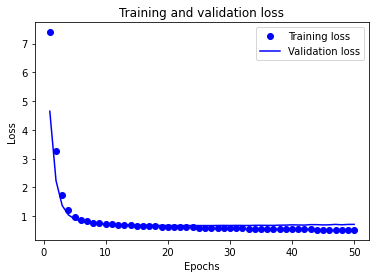

In [23]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

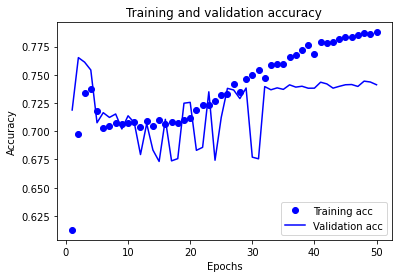

In [24]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 7. Model Evaluation (0.5 + 0.5 = 1 mark)

    7.1) Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
    7.2) Print the two most incorrectly classified records for each class in the test dataset.


In [25]:
results = model.evaluate(X_test,y_test)

print(results)

469/469 [==============================] - 1s 3ms/step - loss: 0.7176 - accuracy: 0.7412
[0.7176137566566467, 0.7411777973175049]


### 8. Hyperparameter Tuning- 

Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

    8.1) Regularization: Train a model without regularization
    8.2) Dropout:Change the position and value of dropout layer

Write a comparison between each model and give reasons for the difference in results.

8.1) Regularization: Train a model without regularization

In [26]:
model_noreg = tf.keras.Sequential()
model_noreg.add(hub_layer)
model_noreg.add(tf.keras.layers.Dense(50, activation='relu'))
model_noreg.add(tf.keras.layers.Dense(25, activation='relu'))
model_noreg.add(tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None))
model_noreg.add(tf.keras.layers.Dense(9, activation='relu'))
model_noreg.add(tf.keras.layers.Dense(3))

model_noreg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 9)                 234       
                                                                 
 dense_7 (Dense)             (None, 3)                 30        
                                                                 
Total params: 48,194,689
Trainable params: 48,194,689


In [27]:
model_noreg.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [28]:
t2_start=process_time()
history2 = model_noreg.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)

t2_stop=process_time()


Epoch 1/50
88/88 [==============================] - 3s 32ms/step - loss: 0.7057 - accuracy: 0.7107 - val_loss: 0.5642 - val_accuracy: 0.7451
Epoch 2/50
88/88 [==============================] - 3s 31ms/step - loss: 0.3466 - accuracy: 0.7457 - val_loss: 0.5655 - val_accuracy: 0.7219
Epoch 3/50
88/88 [==============================] - 3s 31ms/step - loss: 0.2843 - accuracy: 0.7328 - val_loss: 0.5691 - val_accuracy: 0.6688
Epoch 4/50
88/88 [==============================] - 3s 32ms/step - loss: 0.2535 - accuracy: 0.7309 - val_loss: 0.5788 - val_accuracy: 0.6680
Epoch 5/50
88/88 [==============================] - 3s 32ms/step - loss: 0.2260 - accuracy: 0.7404 - val_loss: 0.5982 - val_accuracy: 0.7210
Epoch 6/50
88/88 [==============================] - 3s 31ms/step - loss: 0.2034 - accuracy: 0.7482 - val_loss: 0.6236 - val_accuracy: 0.7285
Epoch 7/50
88/88 [==============================] - 3s 31ms/step - loss: 0.1872 - accuracy: 0.7566 - val_loss: 0.6275 - val_accuracy: 0.7076
Epoch 8/50
88

In [29]:
print("Time Taken for training no_reg model (seconds): ",round((t2_stop-t2_start),6))

Time Taken for training no_reg model (seconds):  176.625


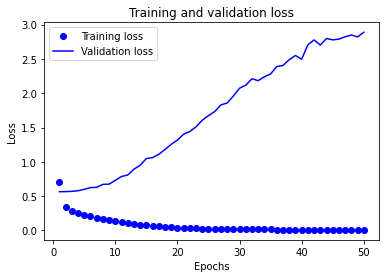

In [30]:
history2_dict = history2.history
history2_dict.keys()

acc = history2_dict['accuracy']
val_acc = history2_dict['val_accuracy']
loss = history2_dict['loss']
val_loss = history2_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

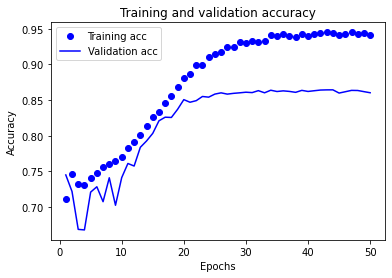

In [31]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
results = model_noreg.evaluate(X_test,y_test)
print("Model without L2 regularization validation set accuracy")
print(results)

469/469 [==============================] - 1s 3ms/step - loss: 2.8892 - accuracy: 0.8603
Model without L2 regularization validation set accuracy
[2.8891611099243164, 0.860288679599762]


8.2) Dropout:Change the position and value of dropout layer

In [33]:
model3 = tf.keras.Sequential()
model3.add(hub_layer)
model3.add(tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model3.add(tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model3.add(tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model3.add(tf.keras.layers.Dense(9, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model3.add(tf.keras.layers.Dense(3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 234       
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
Total params: 48,194,689
Trainable params: 48,194,689
No

In [34]:
model3.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [35]:
t3_start=process_time()
history3 = model3.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)

t3_stop=process_time()


Epoch 1/50
88/88 [==============================] - 3s 32ms/step - loss: 7.0880 - accuracy: 0.8214 - val_loss: 4.3716 - val_accuracy: 0.8544
Epoch 2/50
88/88 [==============================] - 3s 31ms/step - loss: 2.9268 - accuracy: 0.8969 - val_loss: 2.0186 - val_accuracy: 0.8343
Epoch 3/50
88/88 [==============================] - 3s 31ms/step - loss: 1.4428 - accuracy: 0.8811 - val_loss: 1.2030 - val_accuracy: 0.8260
Epoch 4/50
88/88 [==============================] - 3s 31ms/step - loss: 0.9232 - accuracy: 0.8788 - val_loss: 0.9190 - val_accuracy: 0.8294
Epoch 5/50
88/88 [==============================] - 3s 31ms/step - loss: 0.7342 - accuracy: 0.8819 - val_loss: 0.8086 - val_accuracy: 0.8387
Epoch 6/50
88/88 [==============================] - 3s 31ms/step - loss: 0.6495 - accuracy: 0.8903 - val_loss: 0.7553 - val_accuracy: 0.8426
Epoch 7/50
88/88 [==============================] - 3s 31ms/step - loss: 0.6041 - accuracy: 0.8963 - val_loss: 0.7231 - val_accuracy: 0.8547
Epoch 8/50
88

In [36]:
print("Time Taken for training (seconds) whene dropout layer pos and value changed: ",round((t3_stop-t3_start),6))

Time Taken for training (seconds) whene dropout layer pos and value changed:  184.265625


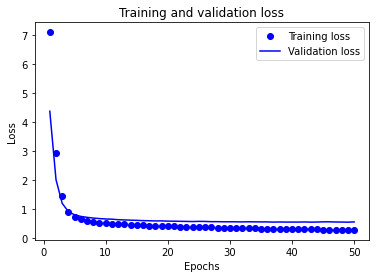

In [37]:
history3_dict = history3.history
history3_dict.keys()

acc = history3_dict['accuracy']
val_acc = history3_dict['val_accuracy']
loss = history3_dict['loss']
val_loss = history3_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

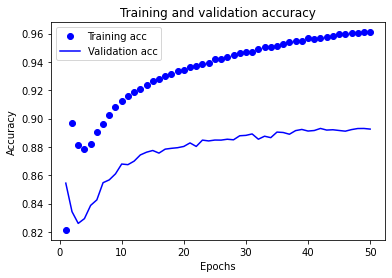

In [38]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
results = model3.evaluate(X_test,y_test)

print(results)

469/469 [==============================] - 1s 3ms/step - loss: 0.5661 - accuracy: 0.8926
[0.5661488175392151, 0.8925772309303284]
